# EDA: treatments.json


In [1]:
import os
os.chdir("../")

import numpy as np
from matplotlib import pyplot as plt
from components.utils import read_json, parse_datetime

plt.style.use("seaborn-v0_8-paper")
plt.style.use("dark_background")
plt.rcParams["grid.color"] = (.5, .5, .5, .2)

In [2]:
treatments = read_json("./data/treatments.json")
treatments.head()

,_id,amount,rate,timestamp,enteredBy,created_at,eventType,duration,temp,absolute,...,type,absorptionTime,reason,correctionRange,insulinNeedsScaleFactor,automatic,syncIdentifier,userEnteredAt,foodType,userLastModifiedAt
0,{'$oid': '6396db3aabbfb1132e1c40d6'},0.15,2.35,2022-12-12T06:59:03Z,loop://iPhone,2022-12-12T06:59:03.000Z,Temp Basal,4.057136,absolute,2.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,{'$oid': '6396db3aabbfb1132e1c40d8'},0.10,1.70,2022-12-12T07:03:06Z,loop://iPhone,2022-12-12T07:03:06.000Z,Temp Basal,4.060481,absolute,1.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,{'$oid': '6396db3aabbfb1132e1c40da'},0.05,1.00,2022-12-12T07:07:10Z,loop://iPhone,2022-12-12T07:07:10.000Z,Temp Basal,4.065975,absolute,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,{'$oid': '6396db3aabbfb1132e1c40dc'},0.05,0.80,2022-12-12T07:11:14Z,loop://iPhone,2022-12-12T07:11:14.000Z,Temp Basal,4.376655,absolute,0.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,{'$oid': '6396db3aabbfb1132e1c40de'},0.00,0.45,2022-12-12T07:15:36Z,loop://iPhone,2022-12-12T07:15:36.000Z,Temp Basal,0.036001,absolute,0.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
treatments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35322 entries, 0 to 35321
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      35322 non-null  object 
 1   amount                   24197 non-null  float64
 2   rate                     25397 non-null  float64
 3   timestamp                31296 non-null  object 
 4   enteredBy                35322 non-null  object 
 5   created_at               35322 non-null  object 
 6   eventType                35316 non-null  object 
 7   duration                 30313 non-null  float64
 8   temp                     25397 non-null  object 
 9   absolute                 25397 non-null  float64
 10  utcOffset                35322 non-null  int64  
 11  carbDelayTime            725 non-null    float64
 12  carbs                    1184 non-null   float64
 13  dia                      3010 non-null   float64
 14  insulinName           

In [4]:
treatments_missing = treatments.isna().sum() / treatments.isna().count()
treatments_missing.name = "% missing"
treatments_missing.sort_values(ascending=False).apply(lambda x: f"{x:.3%}")

insulinNeedsScaleFactor    99.975%
userLastModifiedAt         99.966%
correctionRange            99.946%
reason                     99.941%
glucoseType                99.680%
glucose                    99.680%
foodType                   99.462%
userEnteredAt              99.462%
notes                      99.236%
absorptionTime             98.701%
carbDelayTime              97.947%
carbs                      96.648%
insulinPeak                91.478%
insulinID                  91.478%
insulinCurve               91.478%
insulinName                91.478%
dia                        91.478%
programmed                 86.586%
unabsorbed                 86.586%
type                       86.586%
automatic                  85.253%
syncIdentifier             84.415%
insulin                    78.065%
insulinType                76.731%
amount                     31.496%
absolute                   28.099%
temp                       28.099%
rate                       28.099%
duration            

In [5]:
treatments.describe()

,amount,rate,duration,absolute,utcOffset,carbDelayTime,carbs,dia,insulinPeak,insulin,glucose,unabsorbed,programmed,absorptionTime,insulinNeedsScaleFactor
count,24197.000000,25397.000000,30313.000000,25397.000000,35322.0,725.0,1184.000000,3010.000000,3010.0,7748.000000,113.000000,4738.0,4738.000000,459.000000,9.000000
mean,0.100884,1.098033,6.612669,1.098033,0.0,20.0,23.633446,6.166667,75.0,1.088474,11.274082,0.0,0.983685,146.470588,1.122222
std,0.179302,0.943912,9.258610,0.943912,0.0,0.0,13.462792,0.000000,0.0,1.660618,18.564285,0.0,1.660746,52.143620,0.473756
min,0.000000,0.000000,0.000000,0.000000,0.0,20.0,1.000000,6.166667,75.0,0.100000,5.100000,0.0,0.100000,30.000000,0.500000
25%,0.000000,0.000000,0.133333,0.000000,0.0,20.0,12.000000,6.166667,75.0,0.100000,6.900000,0.0,0.100000,120.000000,0.500000
50%,0.050000,1.050000,4.347016,1.050000,0.0,20.0,24.000000,6.166667,75.0,0.400000,7.800000,0.0,0.300000,180.000000,1.300000
75%,0.150000,1.750000,5.342566,1.750000,0.0,20.0,34.000000,6.166667,75.0,1.000000,9.300000,0.0,1.000000,180.000000,1.500000
max,1.500000,3.000000,460.646686,3.000000,0.0,20.0,110.000000,6.166667,75.0,12.000000,122.523760,0.0,12.000000,300.000000,1.500000


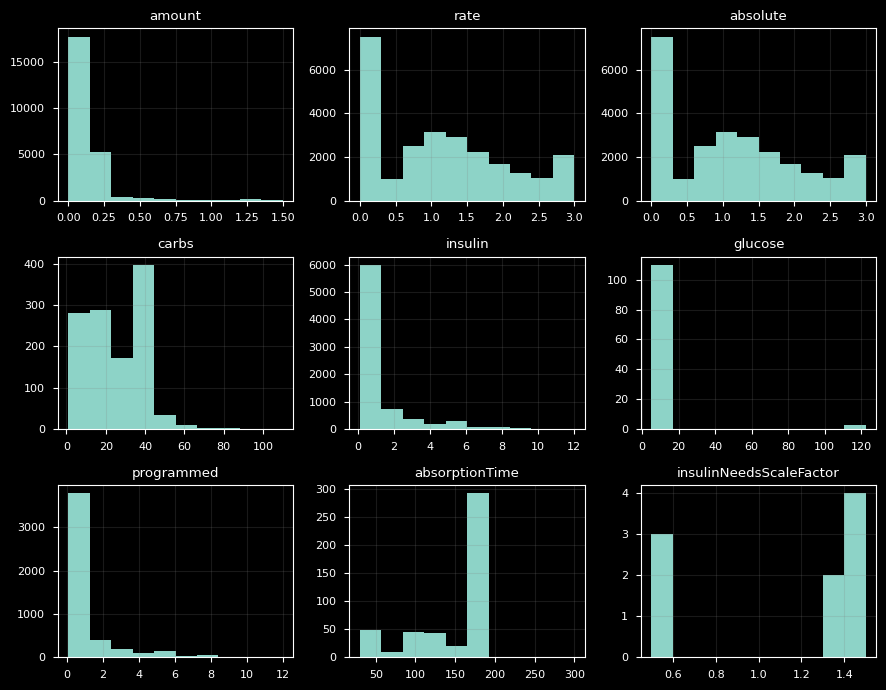

In [13]:
const_cols = [
    "duration", "dia", "unabsorbed", "utcOffset", "carbDelayTime", "insulinPeak"
]

num_cols = [
    col for col in treatments.columns
    if treatments[col].dtype != "O" and col not in const_cols
]

treatments[num_cols].hist(figsize=(9, 7))
plt.tight_layout()

3 outliers with value > 120


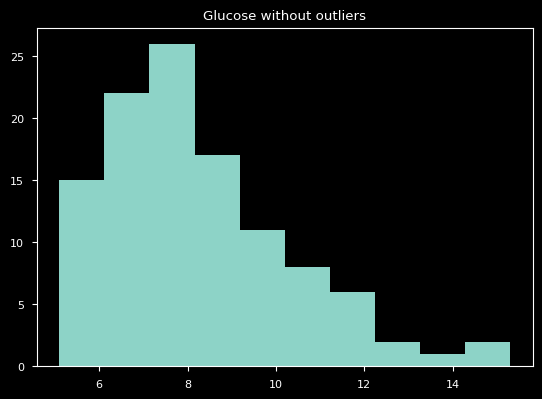

In [39]:
glucose = treatments["glucose"].values
plt.hist(glucose[glucose < 100])
plt.title("Glucose without outliers")

print(len(glucose[glucose > 100]), "outliers with value > 120")

'99.747% of identical records'

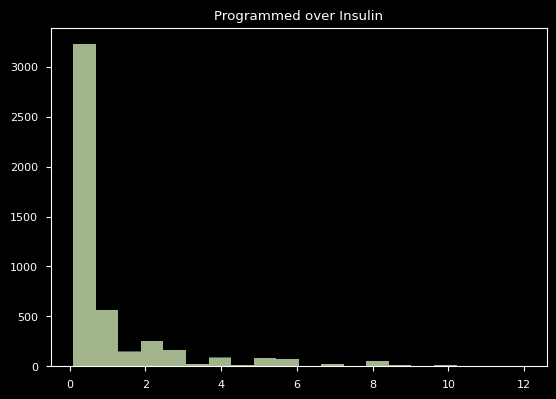

In [36]:
tmp = treatments[["programmed", "insulin"]].dropna().values

plt.title("Programmed over Insulin")
plt.hist(tmp[:, 0], alpha=.5, bins=20)
plt.hist(tmp[:, 1], alpha=.5, bins=20)

pct = np.sum(tmp[:, 0] == tmp[:, 1]) / tmp.shape[0]
f"{pct:.3%} of identical records"

In [48]:
treatments["_id"]

0        {'$oid': '6396db3aabbfb1132e1c40d6'}
1        {'$oid': '6396db3aabbfb1132e1c40d8'}
2        {'$oid': '6396db3aabbfb1132e1c40da'}
3        {'$oid': '6396db3aabbfb1132e1c40dc'}
4        {'$oid': '6396db3aabbfb1132e1c40de'}
                         ...                 
35317    {'$oid': '653182d71b485e8a665a47dd'}
35318    {'$oid': '653182d71b485e8a665a47df'}
35319    {'$oid': '653182d71b485e8a665a47e1'}
35320    {'$oid': '653182d71b485e8a665a47e3'}
35321    {'$oid': '65319d451b485e8a665a53b7'}
Name: _id, Length: 35322, dtype: object

In [54]:
def f(x):
    try:
       return x["$oid"]
    except:
        print(x)
        return x
    
treatments["_id"].apply(f)

1671012729634e307fda94e2
92E778BB-45A6-41AF-84AE-DE6C021181A0
1672043612838be416f508da
427764AD-771D-411F-B1E7-91C892FDA973
8E661E1F-27C3-4B0E-9805-3CFDA2EC4E77
8F7AFBC1-2423-4D16-85A5-D489A925E088
16731679054428206d0051df
786984FB-B53F-4DDA-A82C-A310E3F2F3B3
A56EF08B-1E61-46B1-85EB-B5F637EBB9CD
C7D9BECC-5DC7-4176-ADAC-D8632322276E
167404820693221cf909537c
16754103179619482be233ee
F12201A4-F01B-4699-B336-E0A21BC53199
80DE90F3-57A0-42A8-9392-4FA83F03EF93
1676617510933c681eef45ed
16778731957408e796eeefb4
99331B43-0412-4C42-B968-AB4AD1D1FD05
1679169032925ca137615310
237968E6-70E2-4081-B046-832E23C3C880
168025712803668691f474a8
CF150E23-6D73-42E4-9A60-C95963F2048C
1681726788702206a968dda8
2EA56AA5-E56D-466F-8F47-7F4D2ACFB592
EF16261F-0A38-481F-8CD3-7773EB0896E4
168258988537064ea223fc92
168266257499212d22ce7314
1683571752519598faeb387b
16835769825343ca8f72bf86
C028194C-2712-45B4-9D8D-7D8B38A6A74C
B74CE8B0-744A-4BD3-B376-330BCC0696DA
F89B5171-BDEA-40BB-855E-32D6ABD9B63D
C77D5FFA-DEBB-44FE-A5

0        6396db3aabbfb1132e1c40d6
1        6396db3aabbfb1132e1c40d8
2        6396db3aabbfb1132e1c40da
3        6396db3aabbfb1132e1c40dc
4        6396db3aabbfb1132e1c40de
                   ...           
35317    653182d71b485e8a665a47dd
35318    653182d71b485e8a665a47df
35319    653182d71b485e8a665a47e1
35320    653182d71b485e8a665a47e3
35321    65319d451b485e8a665a53b7
Name: _id, Length: 35322, dtype: object